# Unsupervised Learning
## Creating Customer Segments

## Getting Started

In this project, we will analyze a dataset containing data on various customers' annual spending amounts (reported in *monetary units*) of diverse product categories for internal structure. One goal of this project is to best describe the variation in the different types of customers that a wholesale distributor interacts with. Doing so would equip the distributor with insight into how to best structure their delivery service to meet the needs of each customer.

The dataset for this project can be found on the [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Wholesale+customers). For the purposes of this project, the features `'Channel'` and `'Region'` are excluded in the analysis — with focus instead on the six product categories recorded for customers.

In [1]:
# Import libraries necessary for this project
import numpy as np
import pandas as pd
import renders as rs
from IPython.display import display # Allows the use of display() for DataFrames
import visuals as vs
rstate = 10
# Show matplotlib plots inline (nicely formatted in the notebook)
%matplotlib inline

# Load the wholesale customers dataset
try:
    data = pd.read_csv("customers.csv")
    display(data.head())
    display(data.describe())
    fresh = data['Fresh']
    #New_data= data.drop('Region', axis=1, inplace = True)
    data.drop(['Region', 'Channel'], axis = 1, inplace = True)
    print "Wholesale customers dataset has {} samples with {} features each.".format(*data.shape)
except:
    print "Dataset could not be loaded. Is the dataset missing?"

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,1.322727,2.543182,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,0.468052,0.774272,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,1.000000,1.000000,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,1.000000,2.000000,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,1.000000,3.000000,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,2.000000,3.000000,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,2.000000,3.000000,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


Wholesale customers dataset has 440 samples with 6 features each.


## Data Exploration

In [2]:
# Display a description of the dataset
display(data.describe())

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
count,440.000000,440.000000,440.000000,440.000000,440.000000,440.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
std,12647.328865,7380.377175,9503.162829,4854.673333,4767.854448,2820.105937
min,3.000000,55.000000,3.000000,25.000000,3.000000,3.000000
25%,3127.750000,1533.000000,2153.000000,742.250000,256.750000,408.250000
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000
75%,16933.750000,7190.250000,10655.750000,3554.250000,3922.000000,1820.250000
max,112151.000000,73498.000000,92780.000000,60869.000000,40827.000000,47943.000000


### Selecting Samples
To get a better understanding of the customers and how their data will transform through the analysis, it would be best to select a few sample data points and explore them in more detail. We will try different sets of samples until we obtain customers that vary significantly from one another.

/Library/Python/2.7/site-packages/IPython/html.py:14: ShimWarning: The `IPython.html` package has been deprecated. You should import from `notebook` instead. `IPython.html.widgets` has moved to `ipywidgets`.
  "`IPython.html.widgets` has moved to `ipywidgets`.", ShimWarning)


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265.000000,1196.000000,4221.000000,6404.000000,507.000000,1788.000000
1,3067.000000,13240.000000,23127.000000,3941.000000,9959.000000,731.000000
2,381.000000,4025.000000,9670.000000,388.000000,7271.000000,1371.000000
mean,12000.297727,5796.265909,7951.277273,3071.931818,2881.493182,1524.870455
50%,8504.000000,3627.000000,4755.500000,1526.000000,816.500000,965.500000


Chosen samples of wholesale customers dataset:


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,1265.0,-4600.0,-3730.0,3332.0,-2374.0,263.0
1,-8933.0,7444.0,15176.0,869.0,7078.0,-794.0
2,-11619.0,-1771.0,1719.0,-2684.0,4390.0,-154.0


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,4761.0,-2431.0,-535.0,4878.0,-309.0,822.0
1,-5437.0,9613.0,18371.0,2415.0,9143.0,-235.0
2,-8123.0,398.0,4914.0,-1138.0,6455.0,405.0


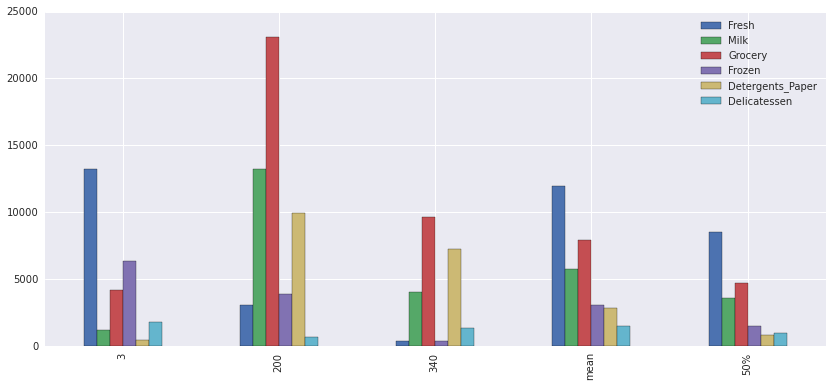

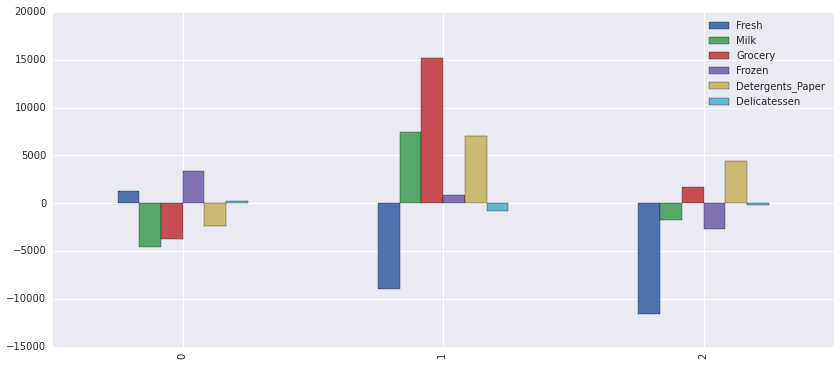

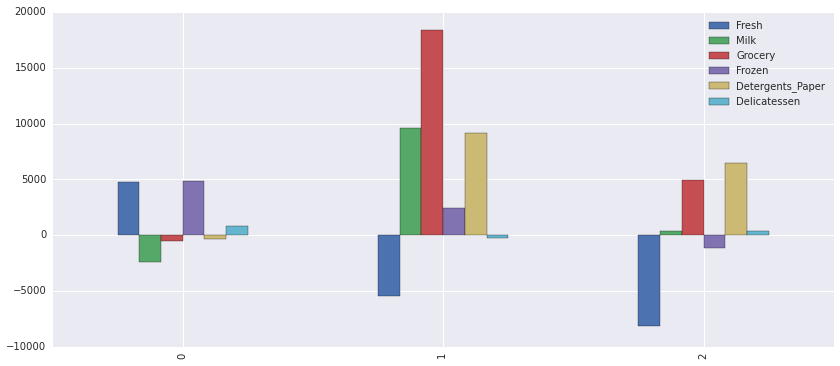

In [3]:
# Select three indices of your choice you wish to sample from the dataset
import seaborn as sns

indices = [3, 200, 340]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(data.loc[indices], columns = data.keys()).reset_index(drop = True)
samples_bar = samples.append(data.describe().loc['mean'])
samples_bar = samples_bar.append(data.describe().loc['50%'])
display(samples_bar)
samples_bar.index = indices + ['mean'] +['50%']
_ = samples_bar.plot(kind='bar', figsize=(14,6))

print "Chosen samples of wholesale customers dataset:"

# display(samples)
# display(samples_bar)

display(samples - np.round(data.mean()))
display(samples - np.round(data.median()))

samplesmean = samples - np.round(data.mean())
_ = samplesmean.plot(kind='bar', figsize=(14,6))
samplesmedian = samples - np.round(data.median())
_ = samplesmedian.plot(kind='bar', figsize=(14,6))

/System/Library/Frameworks/Python.framework/Versions/2.7/Extras/lib/python/matplotlib/collections.py:548: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == 'face':


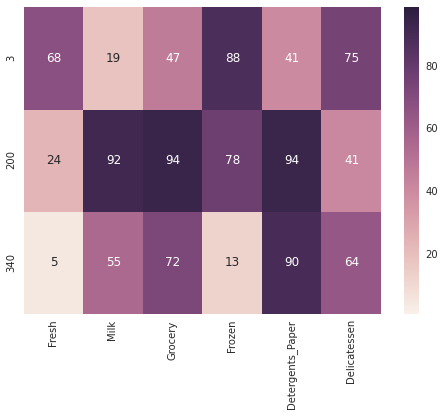

In [4]:
import seaborn as sns
# First, calculate the percentile ranks of the whole dataset.
percentiles = data.rank(pct=True)
# Then, round it up, and multiply by 100
percentiles = 100*percentiles.round(decimals=3)
# Select the indices you chose from the percentiles dataframe
percentiles = percentiles.iloc[indices]
# Now, create the heat map using the seaborn library
_ = sns.heatmap(percentiles, vmin=1, vmax=99, annot=True)

Looking at the bar plots, customer0 seems to be a Restaurant, customer1 seems to be a Retailer and Customer2 seems to be a smaller market place. Both customer1 and customer2 have similar spending habits with different magnitudes. 

### Feature Relevance
One interesting thought to consider is if one (or more) of the six product categories is actually relevant for understanding customer purchasing. That is to say, is it possible to determine whether customers purchasing some amount of one category of products will necessarily purchase some proportional amount of another category of products? We can make this determination quite easily by training a supervised regression learner on a subset of the data with one feature removed, and then score how well that model can predict the removed feature.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


------------------


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9656,7561,214,2674,1338
1,9810,9568,1762,3293,1776
2,8808,7684,2405,3516,7844
3,1196,4221,6404,507,1788
4,5410,7198,3915,1777,5185


1


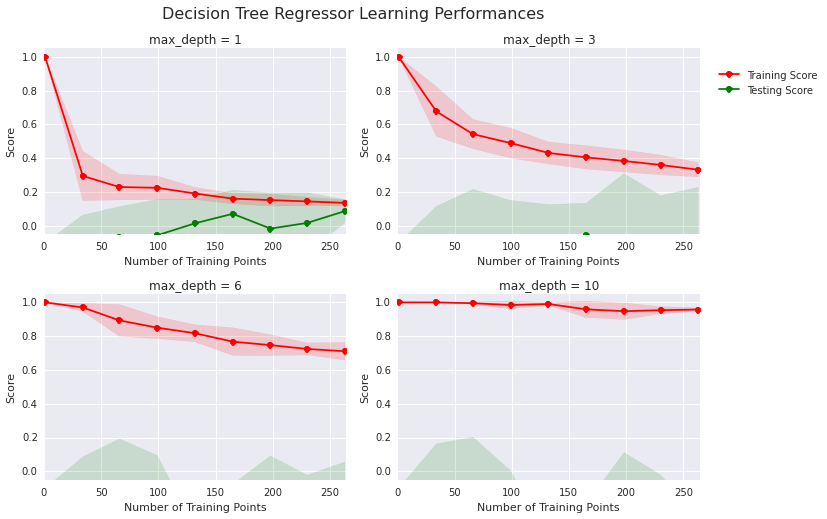

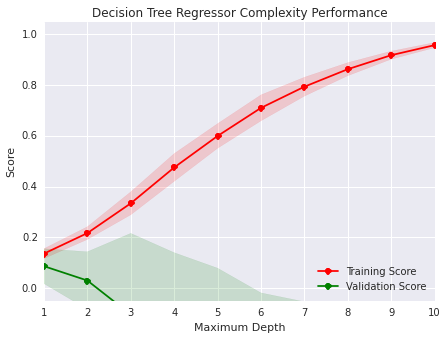

0.0377741185836


In [5]:
# Make a copy of the DataFrame, using the 'drop' function to drop the given feature

display(data.head())
print "------------------"

fresh_col = data['Fresh']
#print("column for freshness")
#print(fresh_col)
#print("end column for freshness")

new_data = data.copy()

new_data.drop(['Fresh'], axis = 1, inplace = True)
display(data.head())
display(new_data.head())


# Split the data into training and testing sets using the given feature as the target
from sklearn import cross_validation
X_train, X_test, y_train, y_test = (cross_validation.train_test_split(new_data, fresh_col, test_size=0.25, random_state=rstate))

# Create a decision tree regressor and fit it to the training set
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import ShuffleSplit

def performance_metric(y_true, y_predict):
    score = r2_score(y_true, y_predict)
    return score

def fit_model(X, y):
    """ Performs grid search over the 'max_depth' parameter for a 
        decision tree regressor trained on the input data [X, y]. """
    
    # Create cross-validation sets from the training data
    cv_sets = ShuffleSplit(X.shape[0], n_iter = 10, test_size = 0.25, random_state = rstate)

    # Create a decision tree regressor object
    regressor = DecisionTreeRegressor()

    # Create a dictionary for the parameter 'max_depth' with a range from 1 to 10
    params = {'max_depth': [1,2,3,4,5,6,7,8,9,10]}
        
    # Transform 'performance_metric' into a scoring function using 'make_scorer' 
    scoring_fnc = make_scorer(performance_metric)

    # Create the grid search object
    grid = GridSearchCV(estimator=regressor, param_grid=params, scoring=scoring_fnc, cv=cv_sets)

    # Fit the grid search object to the data to compute the optimal model
    grid = grid.fit(X, y)

    # Return the optimal model after fitting the data
    return grid.best_estimator_

# TODO: Report the score of the prediction using the testing set
#display(X_train.head(),y_train.head())
reg = fit_model(X_train, y_train)
print(reg.get_params()['max_depth'])
y_test_predict = reg.predict(X_test)
score = performance_metric(y_test, y_test_predict)
vs.ModelLearning(X_train, y_train)
vs.ModelComplexity(X_train, y_train)
# print y_test, y_test_predict
print score

I tried to predict 'Fresh' feature. The reported prediction score is 0.037. This R2 score is very small, ie, we are not able to predict the 'Fresh' column based on the spending habits on the rest of the features. Since we are not able to predict it based on the other features, it is linearly independent of other features. Therefore this feature is necessary for identifying customer's spending habits.

### Visualize Feature Distributions
To get a better understanding of the dataset, we can construct a scatter matrix of each of the six product features present in the data. If the feature I attempted to predict above is relevant for identifying a specific customer, then the scatter matrix below may not show any correlation between that feature and the others. Conversely, if feature is not relevant for identifying a specific customer, the scatter matrix might show a correlation between that feature and another feature in the data.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,12669,9656,7561,214,2674,1338
1,7057,9810,9568,1762,3293,1776
2,6353,8808,7684,2405,3516,7844
3,13265,1196,4221,6404,507,1788
4,22615,5410,7198,3915,1777,5185


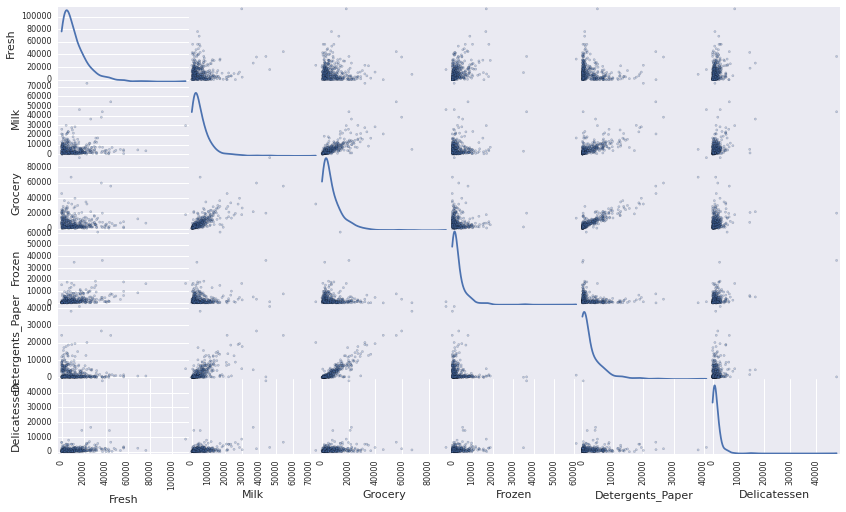

In [6]:
# Produce a scatter matrix for each pair of features in the data
display(data.head())
pd.scatter_matrix(data, alpha = 0.3, figsize = (14,8), diagonal = 'kde');
#pd.scatter_matrix?

There seems to be some correlation between Grocery and milk, detergents_paper and milk, detergents_paper and grocery. To some extent, it does confirm the suspicion about the relevance of the feature. The data is not normally distributed, there is a large skew in the data.

## Data Preprocessing
In this section, we will preprocess the data to create a better representation of customers by performing a scaling on the data and detecting (and optionally removing) outliers.

### Implementation: Feature Scaling
If data is not normally distributed, especially if the mean and median vary significantly (indicating a large skew), it is most [often appropriate](http://econbrowser.com/archives/2014/02/use-of-logarithms-in-economics) to apply a non-linear scaling — particularly for financial data.

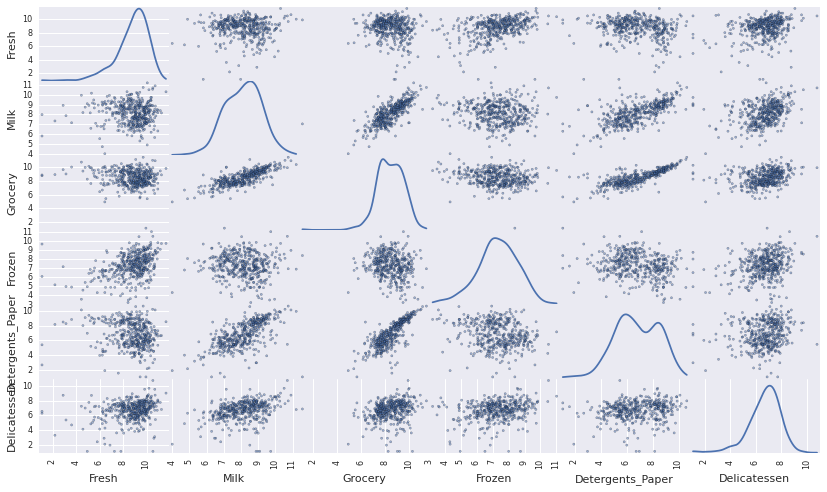

In [7]:
import matplotlib.pyplot as plt
# TODO: Scale the data using the natural logarithm
log_data = np.log(data)

# TODO: Scale the sample data using the natural logarithm
log_samples = np.log(samples)

# Produce a scatter matrix for each pair of newly-transformed features
pd.scatter_matrix(log_data, alpha = 0.5, figsize = (14,8), ax=None, grid=True, diagonal = 'kde');


#sns.corrplot(data)

In [8]:
df = log_data.loc[[128, 65, 154, 75, 66],:]
display(df)
#pd.scatter_matrix(df, alpha = 0.3, figsize = (14,8))

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837


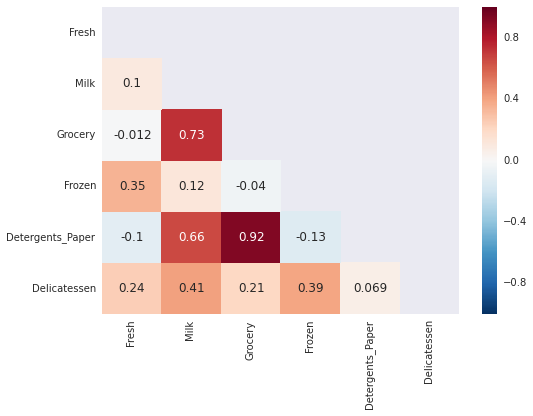

In [9]:
corr = data.corr()
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, annot = True)
#sns.corrplot(data)

### Observation
After applying a natural logarithm scaling to the data, the distribution of each feature appears much more normal. 

In [10]:
# Display the log-transformed sample data
display(log_samples)
display(samples)

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,3067,13240,23127,3941,9959,731
2,381,4025,9670,388,7271,1371


### Outlier Detection
Detecting outliers in the data is extremely important in the data preprocessing step of any analysis. The presence of outliers can often skew results which take into consideration these data points. There are many "rules of thumb" for what constitutes an outlier in a dataset. Here, we will use [Tukey's Method for identfying outliers](http://datapigtechnologies.com/blog/index.php/highlighting-outliers-in-your-data-with-the-tukey-method/): An *outlier step* is calculated as 1.5 times the interquartile range (IQR). A data point with a feature that is beyond an outlier step outside of the IQR for that feature is considered abnormal.

In [11]:
possible_outliers = []
# For each feature find the data points with extreme high or low values
for feature in log_data.keys():
    
    # Calculate Q1 (25th percentile of the data) for the given feature
    Q1 = np.percentile(log_data[feature], 25, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=None)
    
    # Calculate Q3 (75th percentile of the data) for the given feature
    Q3 = np.percentile(log_data[feature], 75, axis=None, out=None, overwrite_input=False, interpolation='linear', keepdims=None)
    
    # Use the interquartile range to calculate an outlier step (1.5 times the interquartile range)
    step = 1.5*(Q3 - Q1)
    
    # Display the outliers
    print "Data points considered outliers for the feature '{}':".format(feature)
    outliers_for_this_feature = log_data[~((log_data[feature] >= Q1 - step) & (log_data[feature] <= Q3 + step))]
    display(outliers_for_this_feature)
    possible_outliers = possible_outliers + list(outliers_for_this_feature.index)
    
# OPTIONAL: Select the indices for data points you wish to remove
print possible_outliers
from collections import Counter
counter = Counter(possible_outliers)
points = dict((k, v) for k, v in counter.items() if v >= 2)
outliers  = points.keys()

print outliers
#outliers  = []

# Remove the outliers, if any were specified
good_data = log_data.drop(log_data.index[outliers]).reset_index(drop = True)
print len(good_data)

Data points considered outliers for the feature 'Fresh':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
81,5.389072,9.163249,9.575192,5.645447,8.964184,5.049856
95,1.098612,7.979339,8.740657,6.086775,5.407172,6.563856
96,3.135494,7.869402,9.001839,4.976734,8.262043,5.379897
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
171,5.298317,10.160530,9.894245,6.478510,9.079434,8.740337
193,5.192957,8.156223,9.917982,6.865891,8.633731,6.501290
218,2.890372,8.923191,9.629380,7.158514,8.475746,8.759669
304,5.081404,8.917311,10.117510,6.424869,9.374413,7.787382


Data points considered outliers for the feature 'Milk':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
86,10.039983,11.205013,10.377047,6.894670,9.906981,6.805723
98,6.220590,4.718499,6.656727,6.796824,4.025352,4.882802
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
356,10.029503,4.897840,5.384495,8.057377,2.197225,6.306275


Data points considered outliers for the feature 'Grocery':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442


Data points considered outliers for the feature 'Frozen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
38,8.431853,9.663261,9.723703,3.496508,8.847360,6.070738
57,8.597297,9.203618,9.257892,3.637586,8.932213,7.156177
65,4.442651,9.950323,10.732651,3.583519,10.095388,7.260523
145,10.000569,9.034080,10.457143,3.737670,9.440738,8.396155
175,7.759187,8.967632,9.382106,3.951244,8.341887,7.436617
264,6.978214,9.177714,9.645041,4.110874,8.696176,7.142827
325,10.395650,9.728181,9.519735,11.016479,7.148346,8.632128
420,8.402007,8.569026,9.490015,3.218876,8.827321,7.239215
429,9.060331,7.467371,8.183118,3.850148,4.430817,7.824446
439,7.932721,7.437206,7.828038,4.174387,6.167516,3.951244


Data points considered outliers for the feature 'Detergents_Paper':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
75,9.923192,7.036148,1.098612,8.390949,1.098612,6.882437
161,9.428190,6.291569,5.645447,6.995766,1.098612,7.711101


Data points considered outliers for the feature 'Delicatessen':


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
66,2.197225,7.335634,8.911530,5.164786,8.151333,3.295837
109,7.248504,9.724899,10.274568,6.511745,6.728629,1.098612
128,4.941642,9.087834,8.248791,4.955827,6.967909,1.098612
137,8.034955,8.997147,9.021840,6.493754,6.580639,3.583519
142,10.519646,8.875147,9.018332,8.004700,2.995732,1.098612
154,6.432940,4.007333,4.919981,4.317488,1.945910,2.079442
183,10.514529,10.690808,9.911952,10.505999,5.476464,10.777768
184,5.789960,6.822197,8.457443,4.304065,5.811141,2.397895
187,7.798933,8.987447,9.192075,8.743372,8.148735,1.098612
203,6.368187,6.529419,7.703459,6.150603,6.860664,2.890372


[65, 66, 81, 95, 96, 128, 171, 193, 218, 304, 305, 338, 353, 355, 357, 412, 86, 98, 154, 356, 75, 154, 38, 57, 65, 145, 175, 264, 325, 420, 429, 439, 75, 161, 66, 109, 128, 137, 142, 154, 183, 184, 187, 203, 233, 285, 289, 343]
[128, 65, 154, 75, 66]
435


There are data points that are outliers for more than one feature. These data points should be removed because outliers can create fake associations between the outlier and the rest of the data. For example, data point 75 is clearly an outlier as it never follows any trend in the 6 plots with grocery against the rest of the five features. 
I also did the pca and clustering with and without outliers. Without outliers, I get the highest silhouette score for k=2. This suggests that the outliers should be removed. 

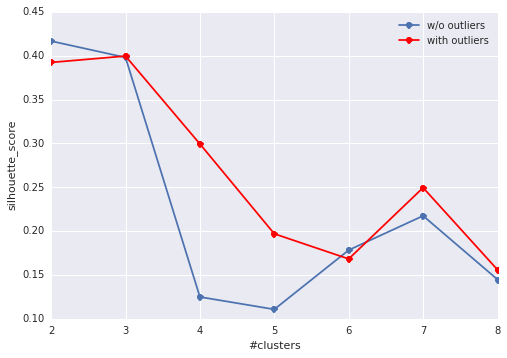

In [12]:
from IPython.display import Image
Image("SC-nclusters.png")

## Feature Transformation
In this section we will use principal component analysis (PCA) to draw conclusions about the underlying structure of the wholesale customer data. Since using PCA on a dataset calculates the dimensions which best maximize variance, we will find which compound combinations of features best describe customers.

### Implementation: PCA

Now that the data has been scaled to a more normal distribution and has had any necessary outliers removed, we can now apply PCA to the `good_data` to discover which dimensions about the data best maximize the variance of features involved. In addition to finding these dimensions, PCA will also report the *explained variance ratio* of each dimension — how much variance within the data is explained by that dimension alone. Note that a component (dimension) from PCA can be considered a new "feature" of the space, however it is a composition of the original features present in the data.

In the code block below, you will need to implement the following:
 - Import `sklearn.decomposition.PCA` and assign the results of fitting PCA in six dimensions with `good_data` to `pca`.
 - Apply a PCA transformation of the sample log-data `log_samples` using `pca.transform`, and assign the results to `pca_samples`.

[[-0.17371704  0.394463    0.45436364 -0.17219603  0.74551495  0.1494356 ]
 [ 0.68513571  0.16239926  0.06937908  0.487691    0.04191162  0.50970874]
 [ 0.67351166 -0.03306794  0.03218274 -0.28481122  0.21824404 -0.64459672]
 [-0.21432619  0.0185577   0.06448674  0.80608348  0.19005006 -0.51348977]
 [ 0.00082162 -0.72228834 -0.34799325  0.03624337  0.56366476  0.19536639]
 [ 0.02927638 -0.54303508  0.81390826  0.0174477  -0.20244363  0.02283197]]
Dimension 1    0.4424
Dimension 2    0.7190
Dimension 3    0.8352
Dimension 4    0.9314
Dimension 5    0.9772
Dimension 6    1.0001
Name: Explained Variance, dtype: float64


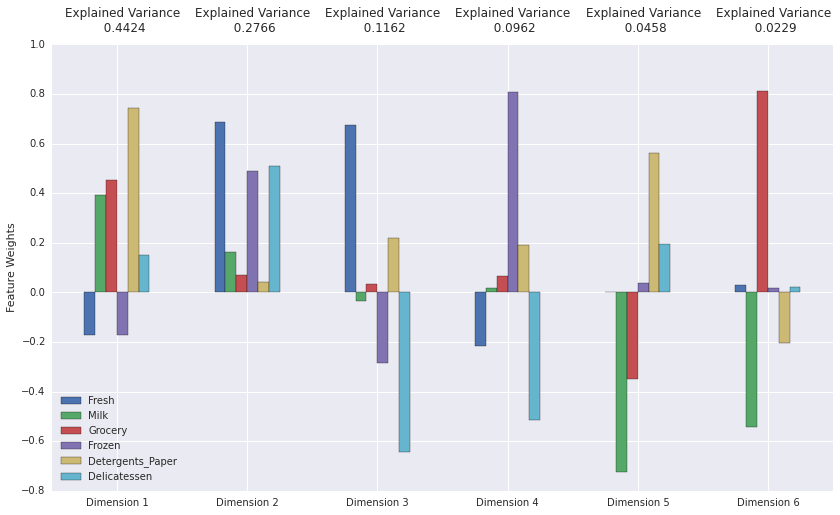

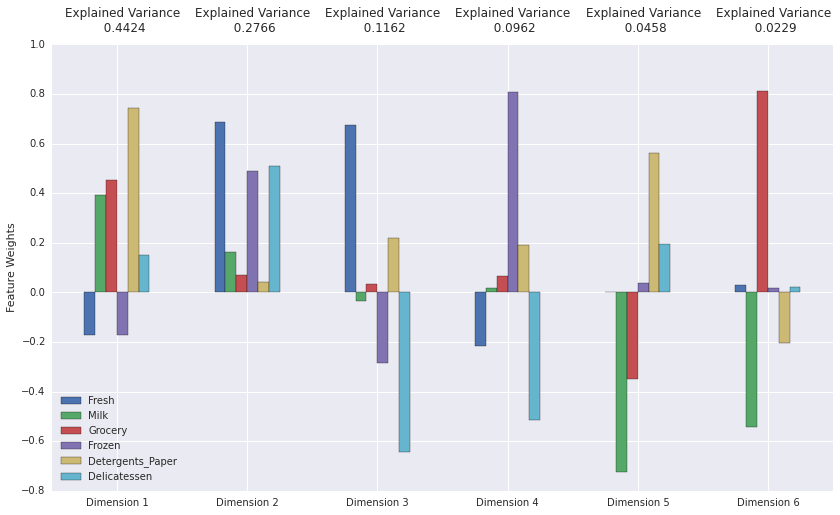

In [13]:
# Apply PCA to the good data with the same number of dimensions as features
from sklearn.decomposition import PCA
pca = PCA(n_components=6)
pca.fit(good_data)
pca.fit(log_data)

# Apply a PCA transformation to the sample log-data
#log_samples.drop(['Fresh'], axis = 1, inplace = True)
#pca1 = PCA(n_components=5)
#pca1.fit(log_samples)
pca_samples = pca.transform(log_samples)

#pca_samples.fit(log_samples)

# Generate PCA results plot
pca_results = rs.pca_results(good_data, pca)
pca_results = rs.pca_results(log_data, pca)

print pca.components_
print pca_results['Explained Variance'].cumsum()

0.4430 and 0.2638 variance in the data is explained by the first and second principal components. In total a variance of .7068 is explained by first and second PCs. By first four, a total of 0.9311 variance is explained. 

The first dimension has the highest overlap with Detergents_Paper, and with milk and grocery, ie, customers with large pc1 will be primarily retailers. 

The second dimension has the highest overlap with Fresh, then with frozen and deli. Customers with large second component and small first component could represent restaurant. Customers with large first and second component could represent large retailers like Safeway. 

The third dimension is positively correlated with Fresh and negatively correlated with Deli, ie, customer with large dimension3 will have lot of Fresh and very little deli. Customers with large dimension3 will be mostly restaurants.

Dimension4 has positive overlap with Frozen and negative overlap with Deli, ie, customers with large dimension4 will have a lot frozen stuff and little to no deli. These customers will represent retailers.

In [14]:
# Display sample log-data after having a PCA transformation applied
display(pd.DataFrame(np.round(pca_samples, 4), columns = pca_results.index.values))
display(log_samples)

,Dimension 1,Dimension 2,Dimension 3,Dimension 4,Dimension 5,Dimension 6
0,-1.1273,1.4580,-0.5247,0.4620,0.6799,0.6652
1,3.0182,0.3952,-0.1711,1.5640,-0.1637,0.0694
2,2.7732,-2.1108,-1.3783,-0.3186,0.8596,-0.0171


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,9.492884,7.086738,8.347827,8.764678,6.228511,7.488853
1,8.028455,9.490998,10.048756,8.279190,9.206232,6.594413
2,5.942799,8.300280,9.176784,5.961005,8.891649,7.223296


### Dimensionality Reduction
When using principal component analysis, one of the main goals is to reduce the dimensionality of the data — in effect, reducing the complexity of the problem. Dimensionality reduction comes at a cost: Fewer dimensions used implies less of the total variance in the data is being explained. Because of this, the *cumulative explained variance ratio* is extremely important for knowing how many dimensions are necessary for the problem. Additionally, if a signifiant amount of variance is explained by only two or three dimensions, the reduced data can be visualized afterwards.

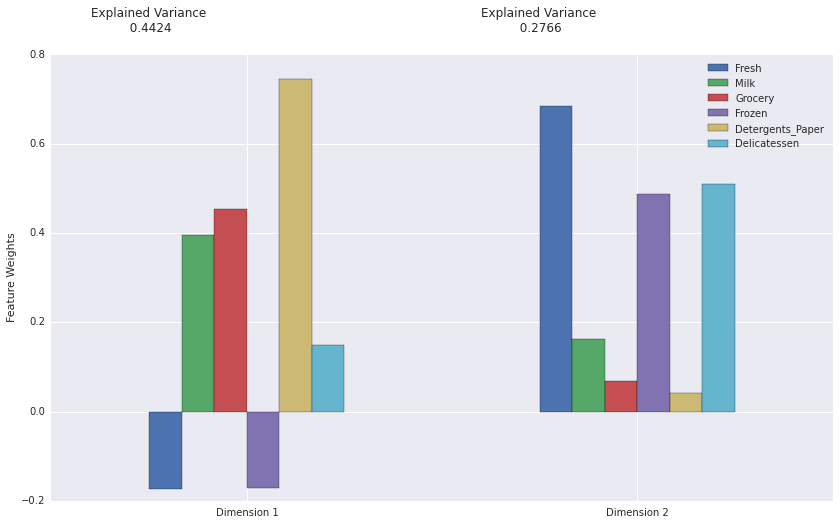

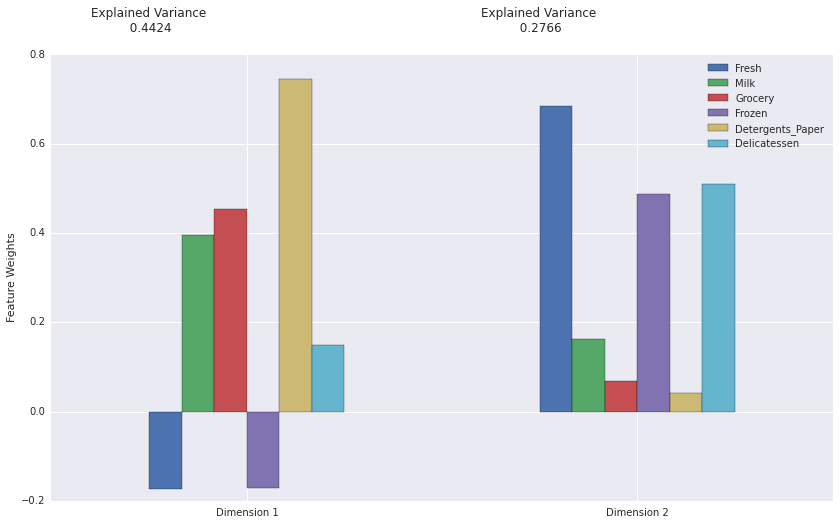

In [15]:
# Fit PCA to the good data using only two dimensions
pca = PCA(n_components=2)
pca.fit(good_data)
pca.fit(log_data)

# Apply a PCA transformation the good data
reduced_data = pca.transform(good_data)
reduced_data_log = pca.transform(log_data)

# Apply a PCA transformation to the sample log-data
pca_samples = pca.transform(log_samples)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])
reduced_data_log = pd.DataFrame(reduced_data_log, columns = ['Dimension 1', 'Dimension 2'])

pca_results = rs.pca_results(good_data, pca)
pca_results = rs.pca_results(log_data, pca)

### Observation
The code below to shows how the log-transformed sample data has changed after having a PCA transformation applied to it using only two dimensions. Notie that the values for the first two dimensions remain unchanged when compared to a PCA transformation in six dimensions.

In [16]:
# Display sample log-data after applying PCA transformation in two dimensions
display(pd.DataFrame(np.round(pca_samples, 4), columns = ['Dimension 1', 'Dimension 2']))

,Dimension 1,Dimension 2
0,-1.1273,1.4580
1,3.0182,0.3952
2,2.7732,-2.1108


## Clustering
In this section, we will choose a clustering algorithm to identify the various customer segments hidden in the data. We will then recover specific data points from the clusters to understand their significance by transforming them back into their original dimension and scale. 

Advantages of K-Means: It is the simplest algorithm and converges fast to a local minimum and therefore one can try a few different initial positions of centroids. Since it is computationally inexpensive, one can use it on large data sets.

Advantages of GMM: It takes into account the covariance in the data and therefore can give clusters of different shapes such as ellipsoids, whereas k-means only gives circular/spherical clusters. K-Means is a special case of GMM. 

Here, I will use GMM for the following reasons:

The data set is small and it has only 6 features, therefore, we can safely use GMM which is computaionally expensive but takes covariance in the data into account and therefore can provide non-spherical clusters. Looking at the data, there seems to be covariance among different features. Also, the KDE for different features in the scatter diagram above is not symmetric and different features have different variance. GMM also provides soft assignments of the data points into different clusters. Looking at the data, it does seem that some points may belong to more than one cluster, eg, some customers may be retailers as well as have a cafe or a food place.  

### Creating Clusters

In [17]:
# Apply your clustering algorithm of choice to the reduced data 
# from sklearn.cluster import KMeans
# from sklearn.metrics import silhouette_score
# import matplotlib.pyplot as plt
# for i in range (2, 3, 1):
#     clusterer = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=300, tol=0.0001, precompute_distances='auto', verbose=0, random_state=rstate, copy_x=True, n_jobs=1)
#     clusterer.fit(reduced_data)

# # Predict the cluster for each data point
#     preds = clusterer.predict(reduced_data)
#     #print(preds)

# # Find the cluster centers
#     centers = clusterer.cluster_centers_
#     #print(centers)

# # Predict the cluster for each transformed sample data point
#     sample_preds = clusterer.predict(pca_samples)

# # TODO: Calculate the mean silhouette coefficient for the number of clusters chosen
#     score = silhouette_score(reduced_data, preds, metric='euclidean')
#     print i, score

# display(reduced_data.head())
# #plt.plot(reduced_data[:,0], reduced_data[:,1], markersize=2)
    
# print len(reduced_data)    
# # import matplotlib.pyplot as plt
# # plt.scatter(i for i in range(5,50,5), score[i], 'o')
# # plt.show()

In [18]:
import matplotlib.pyplot as plt
from sklearn import mixture
from sklearn.metrics import silhouette_score

nclusters = np.arange(2, 3, 1)
score = []
score_log = []

for i in nclusters:
    gm = mixture.GMM(n_components=i, covariance_type='full',random_state=rstate, thresh=None, tol=1e-4, min_covar=0.001, n_iter=100, params='wmc', init_params='wmc', verbose=0)
    
    gm.fit(reduced_data)
    preds = gm.predict(reduced_data)
    pred_probs = gm.predict_proba(reduced_data)
    centers = gm.means_
    sample_preds = gm.predict(pca_samples)
    score.append(silhouette_score(reduced_data, preds, metric='euclidean'))
    
    gm.fit(reduced_data_log)
    preds_log = gm.predict(reduced_data_log)
    pred_probs_log = gm.predict_proba(reduced_data_log)
    centers_log = gm.means_ 
    score_log.append(silhouette_score(reduced_data_log, preds_log, metric='euclidean'))
    
#plt.plot(t, t, 'r--', t, t**2, 'bs', t, t**3, 'g^')
# plt.plot(nclusters, score, '-o', label='w/o outliers')
# plt.plot(nclusters, score_log, '-ro', label='with outliers')   
# plt.legend(loc='upper right')
# plt.ylabel('silhouette_score')
# plt.xlabel('#clusters')
# #plt.show()
# plt.savefig("foo.png", bbox_inches='tight')


Following are the silhouette scores for several clusters:
2 0.408292377473
3 0.396726942494
4 0.290259217871
5 0.180890666317
6 0.187399519573
7 0.225063909645
8 0.255441086283

For two clusters, we get the best silhouette score. 

### Cluster Visualization

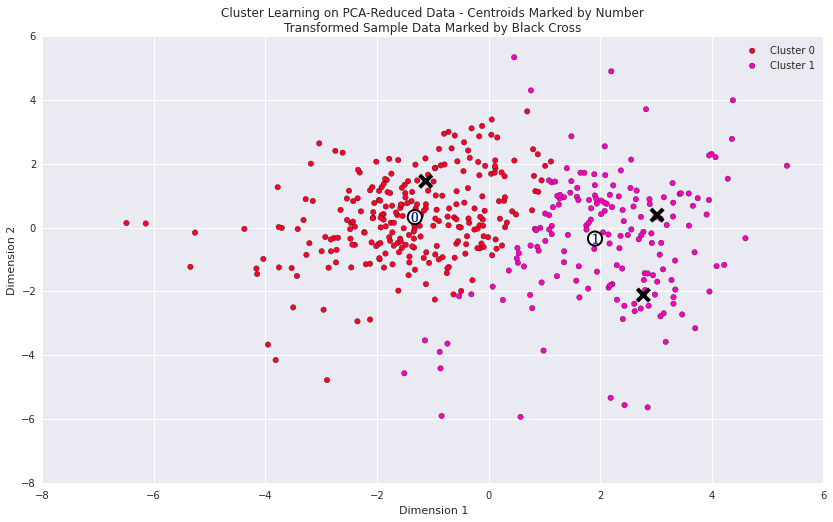

In [19]:
# Display the results of the clustering from implementation
rs.cluster_results(reduced_data, preds, centers, pca_samples)
#rs.cluster_results(reduced_data_log, preds_log, centers_log, pca_samples)

### Implementation: Data Recovery
Each cluster present in the visualization above has a central point. These centers (or means) are not specifically data points from the data, but rather the *averages* of all the data points predicted in the respective clusters. For the problem of creating customer segments, a cluster's center point corresponds to *the average customer of that segment*. Since the data is currently reduced in dimension and scaled by a logarithm, we can recover the representative customer spending from these data points by applying the inverse transformations.

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
Segment 0,9784.0,2108.0,2600.0,2190.0,335.0,763.0
Segment 1,3519.0,6754.0,10764.0,904.0,3617.0,877.0


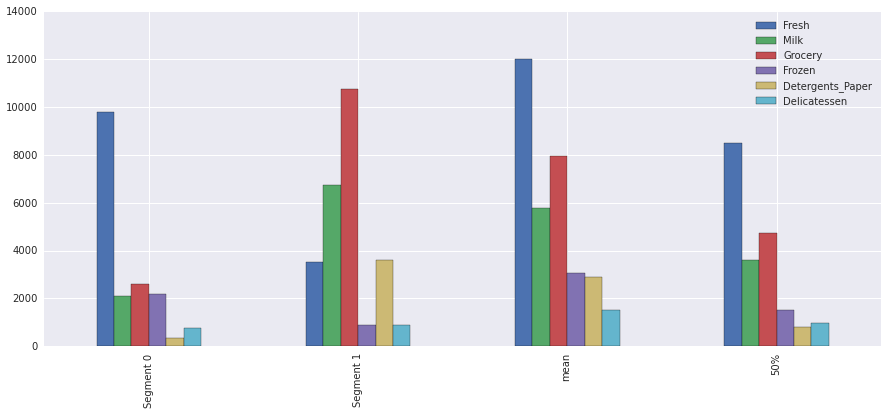

In [20]:
# Inverse transform the centers
log_centers = pca.inverse_transform(centers)

# Exponentiate the centers
true_centers = np.exp(log_centers)

# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = data.keys())
true_centers.index = segments
display(true_centers)

true_centers1 = true_centers.append(data.describe().loc['mean'])
true_centers = true_centers1.append(data.describe().loc['50%'])
_ = true_centers.plot(kind='bar', figsize=(15,6))

As shown in the bar plot above, the segment0 has highest spending on the 'Fresh' and comparatively smaller spendings on other features. Therefore, it seems to represent the group of hotel/Resetaurant/cafes type establishments. The segment1 has the highest feature weights for Milk, Grocery, and Detergents_Paper. Therefore, it seems to represent a retail store.

Cluster 0  --> Restaurant
Cluster 1   --> Retailer

### Cluster assignments for sample points

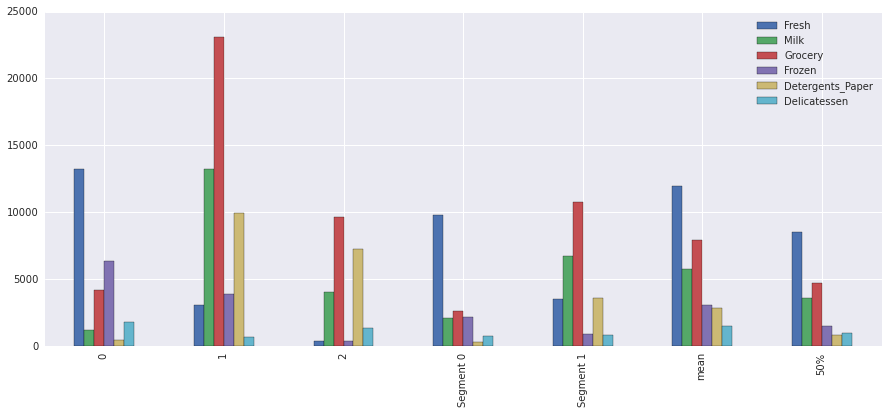

In [21]:
samples_bar = samples.append(data.describe().loc['mean'])
samples_centers = samples.append(true_centers)
_ = samples_centers.plot(kind='bar', figsize=(15,6))

In [22]:
print 'The distance between sample point 0 and center of cluster 0: '
print (samples.iloc[0] - true_centers.iloc[0])
print ('\n')
print 'The distance between sample point 1 and center of cluster 1: '
print (samples.iloc[1] - true_centers.iloc[1])
print ('\n')
print 'The distance between sample point 2 and center of cluster 1: '
print (samples.iloc[2] - true_centers.iloc[1])

The distance between sample point 0 and center of cluster 0: 
Fresh               3481.0
Milk                -912.0
Grocery             1621.0
Frozen              4214.0
Detergents_Paper     172.0
Delicatessen        1025.0
dtype: float64


The distance between sample point 1 and center of cluster 1: 
Fresh                -452.0
Milk                 6486.0
Grocery             12363.0
Frozen               3037.0
Detergents_Paper     6342.0
Delicatessen         -146.0
dtype: float64


The distance between sample point 2 and center of cluster 1: 
Fresh              -3138.0
Milk               -2729.0
Grocery            -1094.0
Frozen              -516.0
Detergents_Paper    3654.0
Delicatessen         494.0
dtype: float64


In [23]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print "Sample point", i, "predicted to be in Cluster", pred

display(samples)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 1
Sample point 2 predicted to be in Cluster 1


,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicatessen
0,13265,1196,4221,6404,507,1788
1,3067,13240,23127,3941,9959,731
2,381,4025,9670,388,7271,1371


As shown in the bar plot above, sample0 resembles closely with segment0 and the spending habits of sample1&2 resemble with that of segment1. From the clustering, indeed the Sample point0 is predicted to be in cluster0, ie, predicted to be a restaurant. Sample points1 and 2 are predicted to be retailer. 
These conclusions match with the intuition above in question1.

## Conclusion

### A/B Test
Companies often run [A/B tests](https://en.wikipedia.org/wiki/A/B_testing) when making small changes to their products or services. If the wholesale distributor wanted to change its delivery service from 5 days a week to 3 days a week, how to you use the structure of the data to help them decide on a group of customers to test?

For an A/B test to be effective, the experimental group has to be similar to the control group. For this, we will have to proportionately choose customers from the cluster0 and cluster1, ie, N0/N fraction of the experimental group customers will come from cluster0 and similarly N1/N fraction of customers will come from cluster1. N0 and N1 are the number of customers in cluster0 and cluster1, respectively. This is called stratified sampling. 
At next level, in each cluster, there might be distribution of customers based on their total speding, therefore, we will have to again create strata like low, medium, and high speding customers and will have to use stratified sampling to proportionally sample the three strata of low, medium and high spending customers.  

If the previous A/B test has given us some correlation between the experimental group and clusters (customer segments), e.g., if the A/B test predicts that segment0 is affected by changing the frequency from 5 days to 3 days and segment1 is not affected, then we could use delivery frequency as the new target variable and the experimental group as the training set. Using this training set, we can use a classifier to classify new customers into two groups of 'affected by the delivery frequency' and 'Not affected by delivery frequency'. Thus, accordingly we can label the new customers and find out the suitable delivery time for them.

One can also use cluster labels as the target variable and then classify the new customers in segment0 or segment1. In this case, one would do the A/B testing on segment0 and segment1 separately. Based on these A/B testing results, one can find out the suitable delivery times for the new customers.



### Visualizing Underlying Distributions

At the beginning of this project, `'Channel'` and `'Region'` features were excluded from the dataset so that the customer product categories were emphasized in the analysis. By reintroducing the `'Channel'` feature to the dataset, an interesting structure emerges when considering the same PCA dimensionality reduction applied earlier on to the original dataset.

In the plot below, each data point is labeled either `'HoReCa'` (Hotel/Restaurant/Cafe) or `'Retail'`. In addition, the sample points are circled in the plot, which identify their labeling.

435


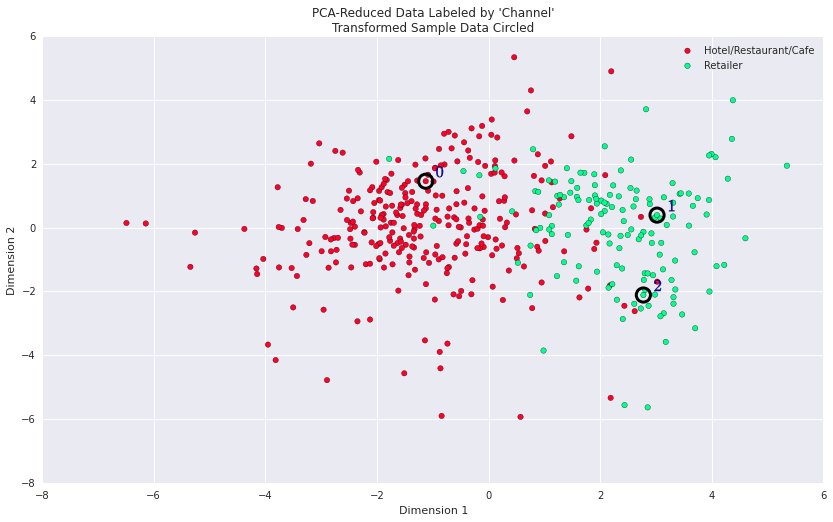

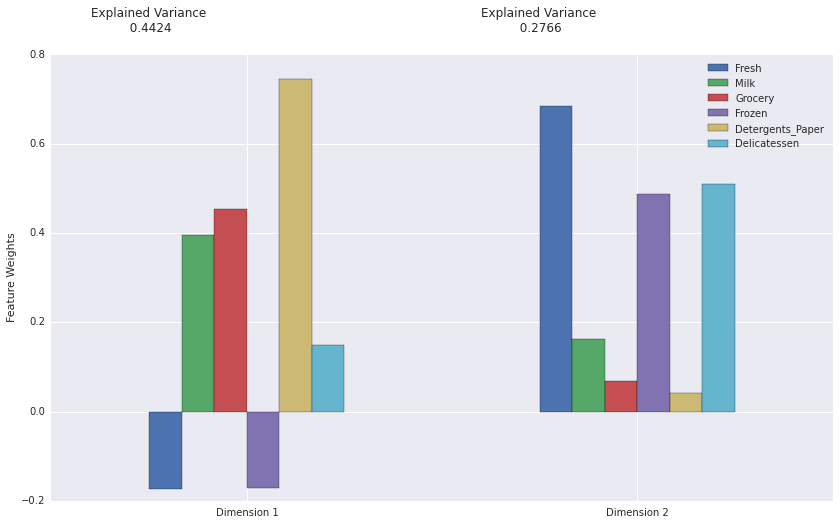

In [24]:
# Display the clustering results based on 'Channel' data
print len(reduced_data)
rs.channel_results(reduced_data, outliers, pca_samples)
pca_results = rs.pca_results(good_data, pca)

### Comparison of clustering with and w/o Channel and Region

Number of clusters and the distribution with and without the 'Channel' and 'Region' are basically the same as in this plot. Green points in the first quadrant having a large positive component of dimension1 can be classified as purely retailers. 